<a href="https://colab.research.google.com/github/amya-singhal/human__emotion_detection_model/blob/main/Human_Emotion_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os



In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print ('User uploaded file "{name}" with length "{length} bytes'.format(name=fn, length = len(uploaded[fn])))

Saving archive.zip to archive.zip
User uploaded file "archive.zip" with length "63252113 bytes


In [ ]:
from zipfile import ZipFile
file_name = "archive.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
picture_size = 48
folder_path_train = "/content/train/"
folder_path_test = "/content/test/"

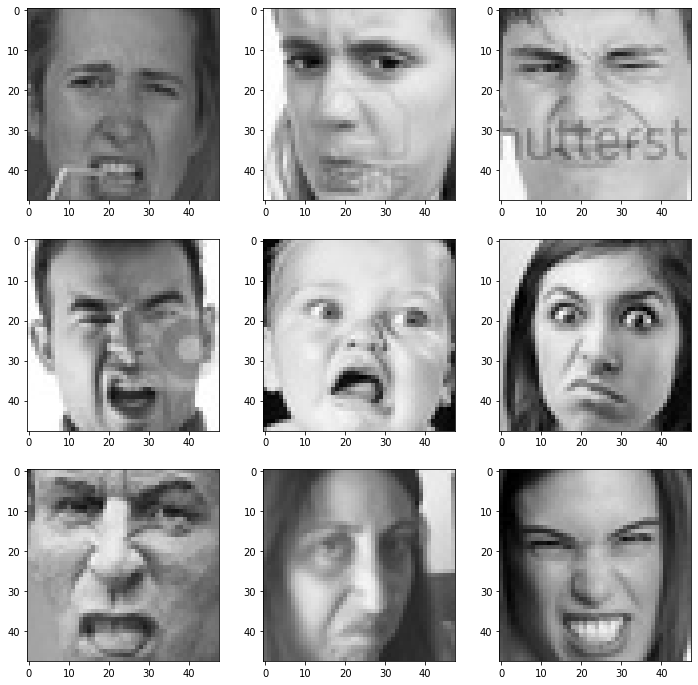

In [ ]:
expression = 'disgust'
plt.figure(figsize = (12,12))
for i in range(1, 10, 1):
  plt.subplot(3,3,i)
  img = load_img(folder_path_train+expression+"/"+ os.listdir(folder_path_train + expression)[i], target_size=(picture_size, picture_size))
  plt.imshow(img)
plt.show()

In [ ]:
batch_size = 128


In [ ]:
datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path_train, 
                                              target_size=(picture_size, picture_size),
                                              color_mode="grayscale", 
                                              batch_size=batch_size, 
                                              class_mode='categorical', 
                                              shuffle=True)

test_set = datagen_test.flow_from_directory(folder_path_test, 
                                              target_size=(picture_size, picture_size),
                                              color_mode="grayscale", 
                                              batch_size=batch_size, 
                                              class_mode='categorical', 
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
no_of_classes='7'

In [ ]:
from keras.metrics import accuracy

model = Sequential()


model.add(Conv2D(64,(3,3), padding = 'same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(512,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation="softmax"))

opt = Adam(learning_rate= 0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.001)

callbacks_list= [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

In [ ]:
history = model.fit_generator(generator=train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              epochs=epochs,
                              validation_data=test_set,
                              validation_steps=test_set.n//test_set.batch_size,
                              callbacks = callbacks_list)

Epoch 1/48


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


224/224 [==============================] - 1437s 6s/step - loss: 2.0056 - accuracy: 0.2387 - val_loss: 1.7511 - val_accuracy: 0.2814 - lr: 1.0000e-04
Epoch 2/48
224/224 [==============================] - 1385s 6s/step - loss: 1.8268 - accuracy: 0.2973 - val_loss: 1.7467 - val_accuracy: 0.3283 - lr: 1.0000e-04
Epoch 3/48
224/224 [==============================] - 1425s 6s/step - loss: 1.7229 - accuracy: 0.3448 - val_loss: 1.6574 - val_accuracy: 0.3641 - lr: 1.0000e-04
Epoch 4/48
224/224 [==============================] - 1388s 6s/step - loss: 1.6517 - accuracy: 0.3641 - val_loss: 1.6591 - val_accuracy: 0.3651 - lr: 1.0000e-04
Epoch 5/48
224/224 [==============================] - 1373s 6s/step - loss: 1.5857 - accuracy: 0.3904 - val_loss: 1.6864 - val_accuracy: 0.3825 - lr: 1.0000e-04
Epoch 6/48
224/224 [==============================] - 1422s 6s/step - loss: 1.5397 - accuracy: 0.4076 - val_loss: 1.4653 - val_accuracy: 0.4315 - lr: 1.0000e-04
Epoch 7/48
224/224 [=========================